<a href="https://colab.research.google.com/github/yleessam/datascience/blob/main/20%EC%B0%A8%EC%8B%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 데이터분석 실습

# 순서
0. 데이터 확인
1. 필요 라이브러리 임포트 및 파일 읽어오기
2. EDA 탐색적 데이터 분석
3. 데이터 전처리 수행
 - 필요한 컬럼 정리
 - 컬럼 데이터 정제
 - Null 처리
 - 컬럼 type 변경하기
4. 데이터 시각화
5. 결과 저장

# #0. 데이터의 확인

https://www.kaggle.com/datasets/blastchar/telco-customer-churn

- 통신사 고객 데이터를 분석해서 고객을 유지하고 고객 이탈률을 줄이기 위한 전략을 탐색한다.

- Churn은 서비스를 중단하거나 업계의 경쟁업체로 이전한 고객 또는 사용자를 의미하는데, 목표는 기존 고객을 유지하고 새로운 고객을 유치하는 것입니다.

- 이 과정을 통해 우리는 정확한 고객이탈 예측 모델을 개발할 수 있습니다.

# * Telco Customer Churn Dataset  컬럼

---


1. CustomerID: Customer ID unique for each customer
2. gender: Whether the customer is a male or a female
3. SeniorCitizen: Whether the customer is a senior citizen or not (1, 0) : 고령자 여부
4. Partner: Whether the customer has a partner or not (Yes, No)
5. Dependents: Whether the customer has dependents or not (Yes, No) : 부양가족 여부
6. Tenure: Number of months the customer has stayed with the company : 서비스 사용 개월수
7. PhoneService: Whether the customer has a phone service or not (Yes, No)
8. MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
9. InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
10. OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
11. OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
12. DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
13. TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
14. StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
15. StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
16. Contract: The contract term of the customer (Month-to-month, One year, Two years)
17. PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
18. PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges: The amount charged to the customer monthly
20. TotalCharges: The total amount charged to the customer
21. Churn: Whether the customer churned or not (Yes or No) : 이탈 여부

# #1. 필요 라이브러리 임포트 및 파일 읽어오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('ticks')
sns.set_palette('pastel')
sns.set_context("notebook")

plt.figure(figsize=(10, 6))
plt.rc("font", size=12) 

<Figure size 1000x600 with 0 Axes>

## CSV 파일 데이터 읽어오기

In [10]:
!cd

C:\Users\jisu\Desktop\hellopython


In [5]:
df = pd.read_csv('./cust_data_v1.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# #2. 탐색적 데이터 분석

## 데이터 탐색하기

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7034 non-null   object 
 2   SeniorCitizen     7042 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7041 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7040 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  3580 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7042 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 데이터 타입

In [16]:
df.dtypes

customerID           object
gender               object
SeniorCitizen       float64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Null 데이터 확인

### 결측치 비율에 따른 처리
1. 5% 미만
- 제거
- 대체
2. 5~30% 
- 통계적 대체 (평균, 중앙값, 최빈값)
- 예측 모델을 통한 대체 (knn imputation)
3. 30~60%
- 변수 제거
- 다중 대체법 (Multiple Imputation)
- 결측치 자체를 정보로 활용 (새로운 열을 생성해 결측 여부를 변수로 포함)
4. 60% 이상
- 변수 제거
- 특정 패턴이 있다면 별도 처리

In [19]:
df.isna().sum()

customerID             0
gender                 9
SeniorCitizen          1
Partner                0
Dependents             2
tenure                 0
PhoneService           3
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection    3463
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               1
PaperlessBilling       0
PaymentMethod          1
MonthlyCharges         1
TotalCharges           0
Churn                  0
dtype: int64

### DeviceProtection은 결측치가 50%정도이므로 제거하기로 결정

In [21]:
df['DeviceProtection'].value_counts(normalize=True, dropna=False)

DeviceProtection
NaN                    0.491694
No                     0.219935
Yes                    0.177907
No internet service    0.110464
Name: proportion, dtype: float64

## gender, SeniorCitizen, Dependents, Contract, PaymentMethod, MonthlyCharges는 결측치가 매우 적으므로 결측치 행 제거

In [23]:
df['gender'].value_counts(normalize=True, dropna=False)

gender
Male      0.504331
Female    0.494392
NaN       0.001278
Name: proportion, dtype: float64

In [24]:
df['SeniorCitizen'].value_counts(normalize=True, dropna=False)

SeniorCitizen
0.0    0.837711
1.0    0.162147
NaN    0.000142
Name: proportion, dtype: float64

In [25]:
df['Dependents'].value_counts(normalize=True, dropna=False)

Dependents
No     0.700270
Yes    0.299446
NaN    0.000284
Name: proportion, dtype: float64

In [26]:
df['Contract'].value_counts(normalize=True, dropna=False)

Contract
Month-to-month    0.550050
Two year          0.240664
One year          0.209144
NaN               0.000142
Name: proportion, dtype: float64

In [27]:
df['PaymentMethod'].value_counts(normalize=True, dropna=False)

PaymentMethod
Electronic check             0.335794
Mailed check                 0.228880
Bank transfer (automatic)    0.219225
Credit card (automatic)      0.215959
NaN                          0.000142
Name: proportion, dtype: float64

In [28]:
df['MonthlyCharges'].value_counts(normalize=True, dropna=False)

MonthlyCharges
20.05     0.008661
19.85     0.006389
19.95     0.006247
19.90     0.006247
19.65     0.006105
            ...   
114.70    0.000142
43.65     0.000142
87.80     0.000142
112.40    0.000142
78.70     0.000142
Name: proportion, Length: 1586, dtype: float64

## 통계 정보

In [30]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7042.000000,7043.000000,7042.000000
mean,0.162170,32.371149,64.763256
std,0.368633,24.559481,30.091898
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# #3. 데이터 전처리 수행

## 컬럼 삭제

In [33]:
help(pd.DataFrame.drop)

Help on function drop in module pandas.core.frame:

drop(self, labels: 'IndexLabel | None' = None, *, axis: 'Axis' = 0, index: 'IndexLabel | None' = None, columns: 'IndexLabel | None' = None, level: 'Level | None' = None, inplace: 'bool' = False, errors: 'IgnoreRaise' = 'raise') -> 'DataFrame | None'
    Drop specified labels from rows or columns.

    Remove rows or columns by specifying label names and corresponding
    axis, or by directly specifying index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level. See the :ref:`user guide <advanced.shown_levels>`
    for more information about the now unused levels.

    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop. A tuple will be used as a single
        label and not treated as a list-like.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        

In [34]:
df['customerID'].nunique()

7043

In [7]:
df = df.drop(columns=['DeviceProtection', 'customerID'])

In [9]:
df = df.dropna()

In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,0.0,No,No,34,Yes,No,DSL,Yes,No,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0.0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0.0,No,No,45,No,No phone service,DSL,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0.0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0.0,No,No,8,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0.0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,Male,0.0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0.0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0.0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


## 컬럼 내용 변경하기

범주형 문자 데이터를 숫자 변환하는것은 성능에 많은 영향을 미치므로 꼭 변환한다.<br>
null, _ 같은 문제있는 문자 데이터를 모델링하기 전에 미리 다른 데이터로 변경, 혹은 삭제한다.

## 인코딩
1. 명목형
- 원핫인코딩
- `pd.get_dummies()`
2. 순서형
- 라벨 인코딩
- `replace()` or `map()`

In [40]:
df.select_dtypes(include=object).columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [41]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.encoding:

get_dummies(data, prefix=None, prefix_sep: 'str | Iterable[str] | dict[str, str]' = '_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'NpDtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.

    Each variable is converted in as many 0/1 variables as there are different
    values. Columns in the output are each named after a value; if the input is
    a DataFrame, the name of the original variable is prepended to the value.

    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapp

### Contract는 순서형인코딩
### TotalCharges는 수치형이지만 빈 문자열이 있으므로 제거하고 타입 변환
### 나머지는 명목형인코딩

In [43]:
df['gender'].value_counts()

gender
Male      3550
Female    3477
Name: count, dtype: int64

In [44]:
df['Partner'].value_counts()

Partner
No     3629
Yes    3398
Name: count, dtype: int64

In [45]:
df['Dependents'].value_counts()

Dependents
No     4920
Yes    2107
Name: count, dtype: int64

In [46]:
df['PhoneService'].value_counts()

PhoneService
Yes    6346
No      681
Name: count, dtype: int64

In [47]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3380
Yes                 2966
No phone service     681
Name: count, dtype: int64

In [48]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3090
DSL            2416
No             1521
Name: count, dtype: int64

In [49]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3492
Yes                    2014
No internet service    1521
Name: count, dtype: int64

In [50]:
df['OnlineBackup'].value_counts()

OnlineBackup
No                     3083
Yes                    2423
No internet service    1521
Name: count, dtype: int64

In [51]:
df['TechSupport'].value_counts()

TechSupport
No                     3467
Yes                    2039
No internet service    1521
Name: count, dtype: int64

In [52]:
df['StreamingTV'].value_counts()

StreamingTV
No                     2803
Yes                    2703
No internet service    1521
Name: count, dtype: int64

In [53]:
df['StreamingMovies'].value_counts()

StreamingMovies
No                     2777
Yes                    2729
No internet service    1521
Name: count, dtype: int64

In [54]:
df['Contract'].value_counts()

Contract
Month-to-month    3866
Two year          1690
One year          1471
Name: count, dtype: int64

In [55]:
df['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4158
No     2869
Name: count, dtype: int64

In [56]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2360
Mailed check                 1609
Bank transfer (automatic)    1540
Credit card (automatic)      1518
Name: count, dtype: int64

In [57]:
df['TotalCharges'].value_counts()

TotalCharges
          11
20.2      10
19.75      9
19.9       8
19.65      8
          ..
203.95     1
6849.4     1
692.35     1
130.15     1
306.6      1
Name: count, Length: 6517, dtype: int64

In [58]:
df['Churn'].value_counts()

Churn
No     5161
Yes    1866
Name: count, dtype: int64

In [11]:
(df['TotalCharges'] == ' ').sum()

11

In [13]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].dropna()
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [15]:
df['Contract'] = df['Contract'].replace({
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
}).astype(object).astype(int)

C:\Users\jisu\AppData\Local\Temp\ipykernel_19140\890379896.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Contract'] = df['Contract'].replace({


In [17]:
df_encoded = pd.get_dummies(data=df,
                           columns=df.select_dtypes(include=object).columns,
                           drop_first=True)
df_encoded

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
1,0.0,34,1,56.95,1889.50,True,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,0.0,2,0,53.85,108.15,True,False,False,True,False,...,False,False,False,False,False,True,False,False,True,True
3,0.0,45,1,42.30,1840.75,True,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
4,0.0,2,0,70.70,151.65,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,True
5,0.0,8,0,99.65,820.50,False,False,False,True,False,...,False,False,True,False,True,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0.0,72,2,21.15,1419.40,False,False,False,True,False,...,False,True,False,True,False,True,False,False,False,False
7038,0.0,24,1,84.80,1990.50,True,True,True,True,False,...,True,False,True,False,True,True,False,False,True,False
7039,0.0,72,1,103.20,7362.90,False,True,True,True,False,...,False,False,True,False,True,True,True,False,False,False
7040,0.0,11,0,29.60,346.45,False,True,True,False,True,...,False,False,False,False,False,True,False,True,False,False


In [19]:
for i in df_encoded.columns:
    if df_encoded[i].dtype=='bool':
        df_encoded[i] = df_encoded[i].astype(int)
df_encoded

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
1,0.0,34,1,56.95,1889.50,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,2,0,53.85,108.15,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
3,0.0,45,1,42.30,1840.75,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0.0,2,0,70.70,151.65,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,1
5,0.0,8,0,99.65,820.50,0,0,0,1,0,...,0,0,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0.0,72,2,21.15,1419.40,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
7038,0.0,24,1,84.80,1990.50,1,1,1,1,0,...,1,0,1,0,1,1,0,0,1,0
7039,0.0,72,1,103.20,7362.90,0,1,1,1,0,...,0,0,1,0,1,1,1,0,0,0
7040,0.0,11,0,29.60,346.45,0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0


In [109]:
df_encoded.describe()

,SeniorCitizen,tenure,Contract,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
count,7027.000000,7027.000000,7027.000000,7027.000000,7016.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,...,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000,7027.000000
mean,0.162516,32.384659,0.690337,64.778149,2284.484571,0.505194,0.483563,0.299843,0.903088,0.096912,...,0.290167,0.216451,0.384659,0.216451,0.388359,0.591718,0.216024,0.335847,0.228974,0.265547
std,0.368950,24.554677,0.833590,30.087527,2266.640094,0.500009,0.499765,0.458222,0.295859,0.295859,...,0.453871,0.411854,0.486549,0.411854,0.487412,0.491551,0.411560,0.472319,0.420202,0.441656
min,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,0.000000,35.550000,401.762500,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,0.000000,70.350000,1398.975000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,1.000000,89.850000,3796.912500,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,72.000000,2.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# #4. 시각화

In [29]:
help(sns.countplot)

Help on function countplot in module seaborn.categorical:

countplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, stat='count', width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.

    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.

    Note that :func:`histplot` function offers similar functionality with additional
    features (e.g. bar stacking), although its default behavior is somewhat different.

    See the :ref:`tutorial <categorical_tutorial>` for more information.

    .. note::
        By default, this function treats one of the variables as categorical
 

## 범주형

### Churn, PhoneService, SeniorCitizen 
- PhoneService,SeniorCitizen는 비율이 극단적임
### Dependents, gender, Partner
### MultipleLines, InternetService, OnlineSecurity
### OnlineBackup, TechSupport, StreamingTV
### StreamingMovies, Contract, PaperlessBilling, PaymentMethod

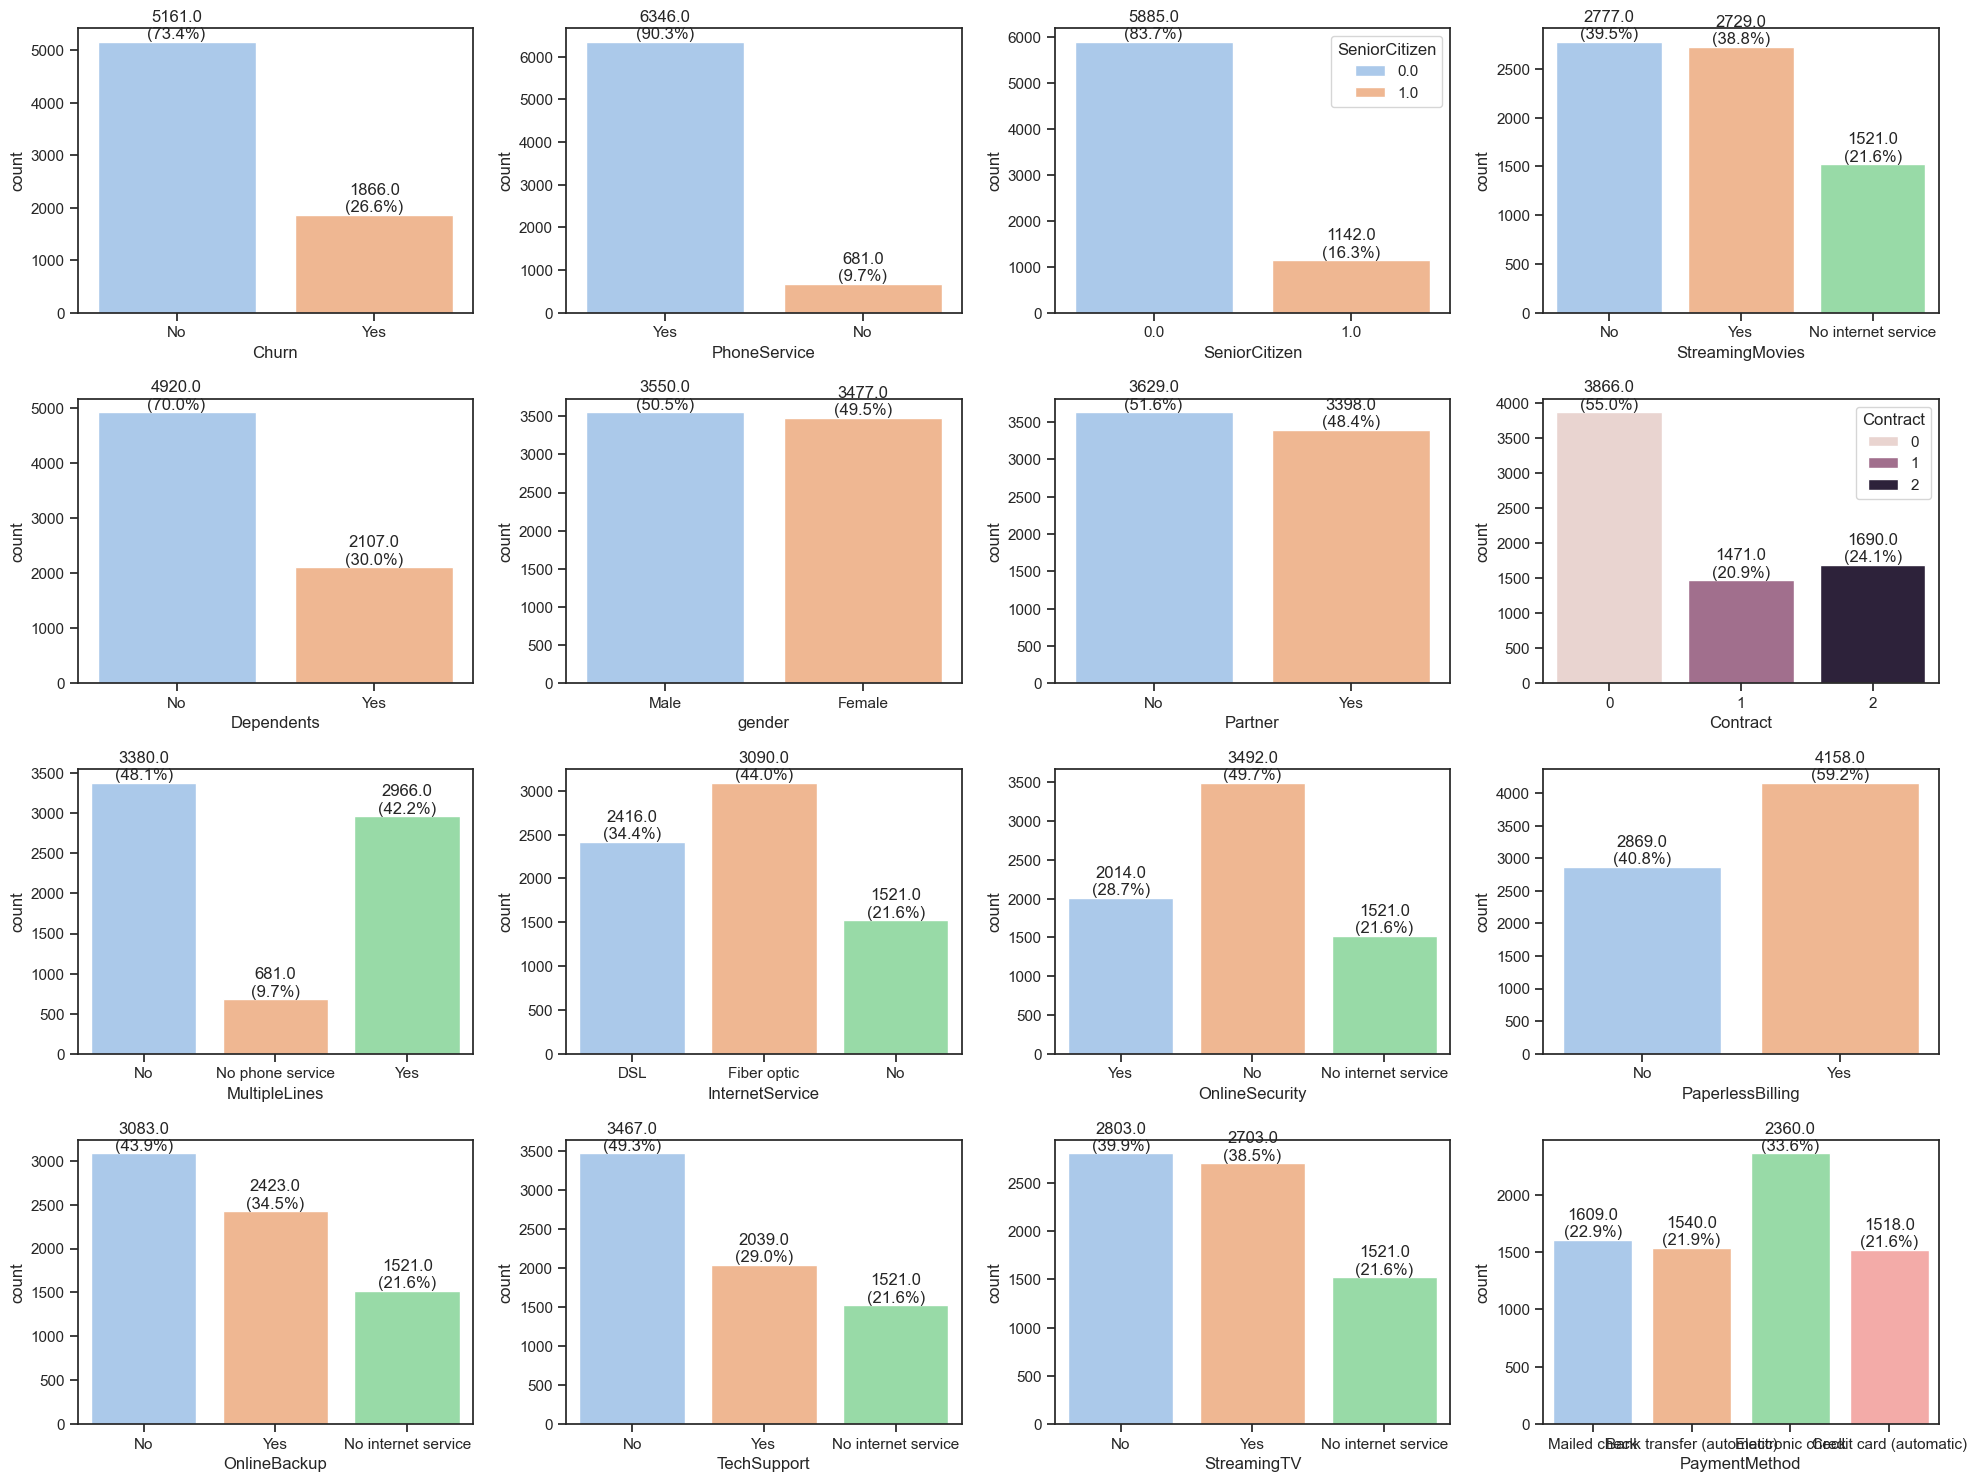

In [143]:
fig, ax = plt.subplots(4, 4, figsize=(20, 15))  

sns.countplot(data=df, x='Churn', hue='Churn', ax=ax[0, 0])
sns.countplot(data=df, x='Dependents', hue='Dependents', ax=ax[1, 0])
sns.countplot(data=df, x='MultipleLines', hue='MultipleLines', ax=ax[2, 0])
sns.countplot(data=df, x='OnlineBackup', hue='OnlineBackup', ax=ax[3, 0])

sns.countplot(data=df, x='PhoneService', hue='PhoneService', ax=ax[0, 1])
sns.countplot(data=df, x='gender', hue='gender', ax=ax[1, 1])
sns.countplot(data=df, x='InternetService', hue='InternetService', ax=ax[2, 1])
sns.countplot(data=df, x='TechSupport', hue='TechSupport', ax=ax[3, 1])

sns.countplot(data=df, x='SeniorCitizen', hue='SeniorCitizen', ax=ax[0, 2])
sns.countplot(data=df, x='Partner', hue='Partner', ax=ax[1, 2])
sns.countplot(data=df, x='OnlineSecurity', hue='OnlineSecurity', ax=ax[2, 2])
sns.countplot(data=df, x='StreamingTV', hue='StreamingTV', ax=ax[3, 2])

sns.countplot(data=df, x='StreamingMovies', hue='StreamingMovies', ax=ax[0, 3])
sns.countplot(data=df, x='Contract', hue='Contract', ax=ax[1, 3])
sns.countplot(data=df, x='PaperlessBilling', hue='PaperlessBilling', ax=ax[2, 3])
sns.countplot(data=df, x='PaymentMethod', hue='PaymentMethod', ax=ax[3, 3]) 

for i in range(len(ax)):
    for j in range(len(ax[i])):
        for p in ax[i, j].patches:
            height = p.get_height()
            if height > 0:
                ratio = height / len(df) * 100 
                ax[i, j].annotate(f'{height}\n({ratio:.1f}%)', 
                                  (p.get_x() + p.get_width() / 2., height), 
                                  ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 수치형

## Histgram

### tenure, MonthlyCharges, TotalCharges

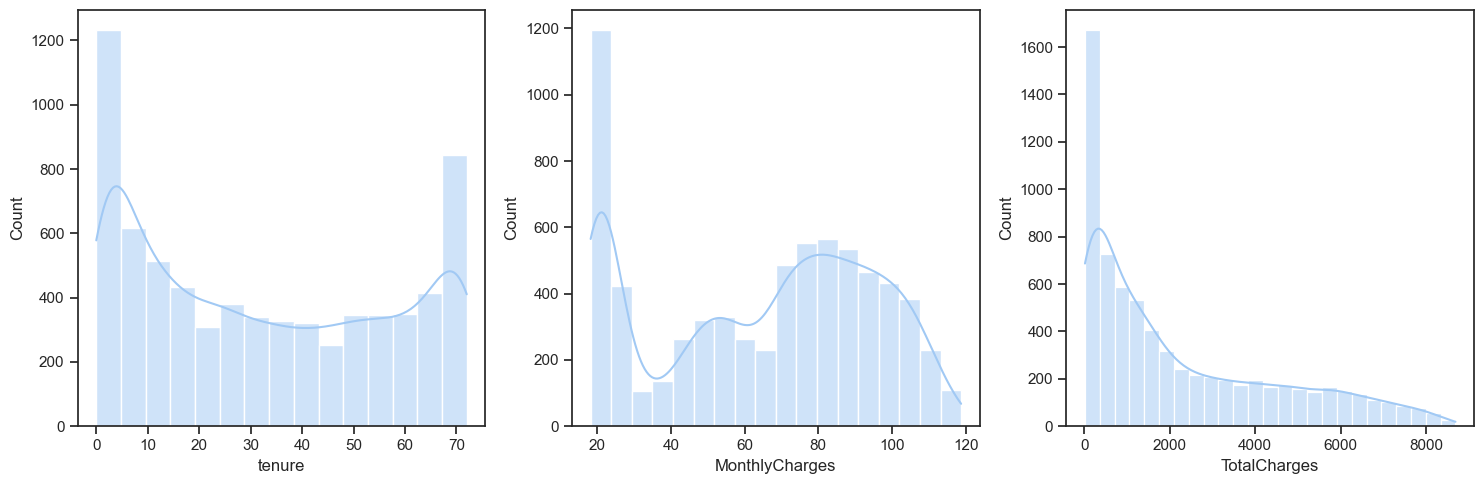

In [59]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=df, x='tenure',kde=True, ax=ax[0])
sns.histplot(data=df, x='MonthlyCharges',kde=True, ax=ax[1])
sns.histplot(data=df, x='TotalCharges',kde=True, ax=ax[2])

plt.tight_layout()

## violinplot

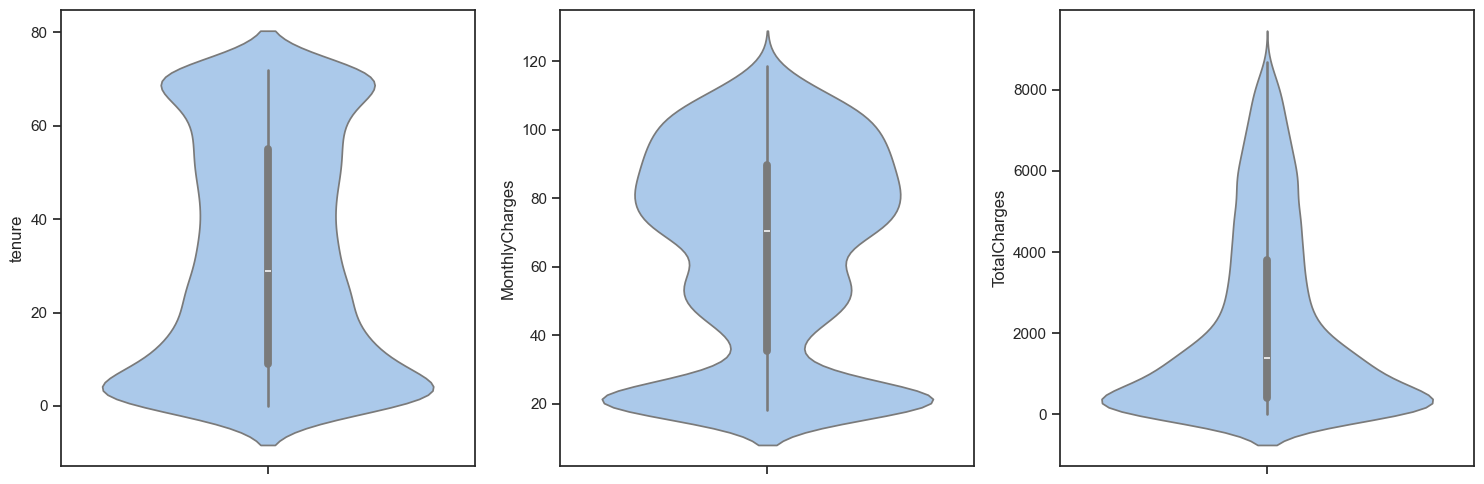

In [121]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.violinplot(data=df, y='tenure', ax=ax[0])
sns.violinplot(data=df, y='MonthlyCharges', ax=ax[1])
sns.violinplot(data=df, y='TotalCharges', ax=ax[2])

plt.tight_layout()
plt.show()

## 상관관계분석

## heatmap

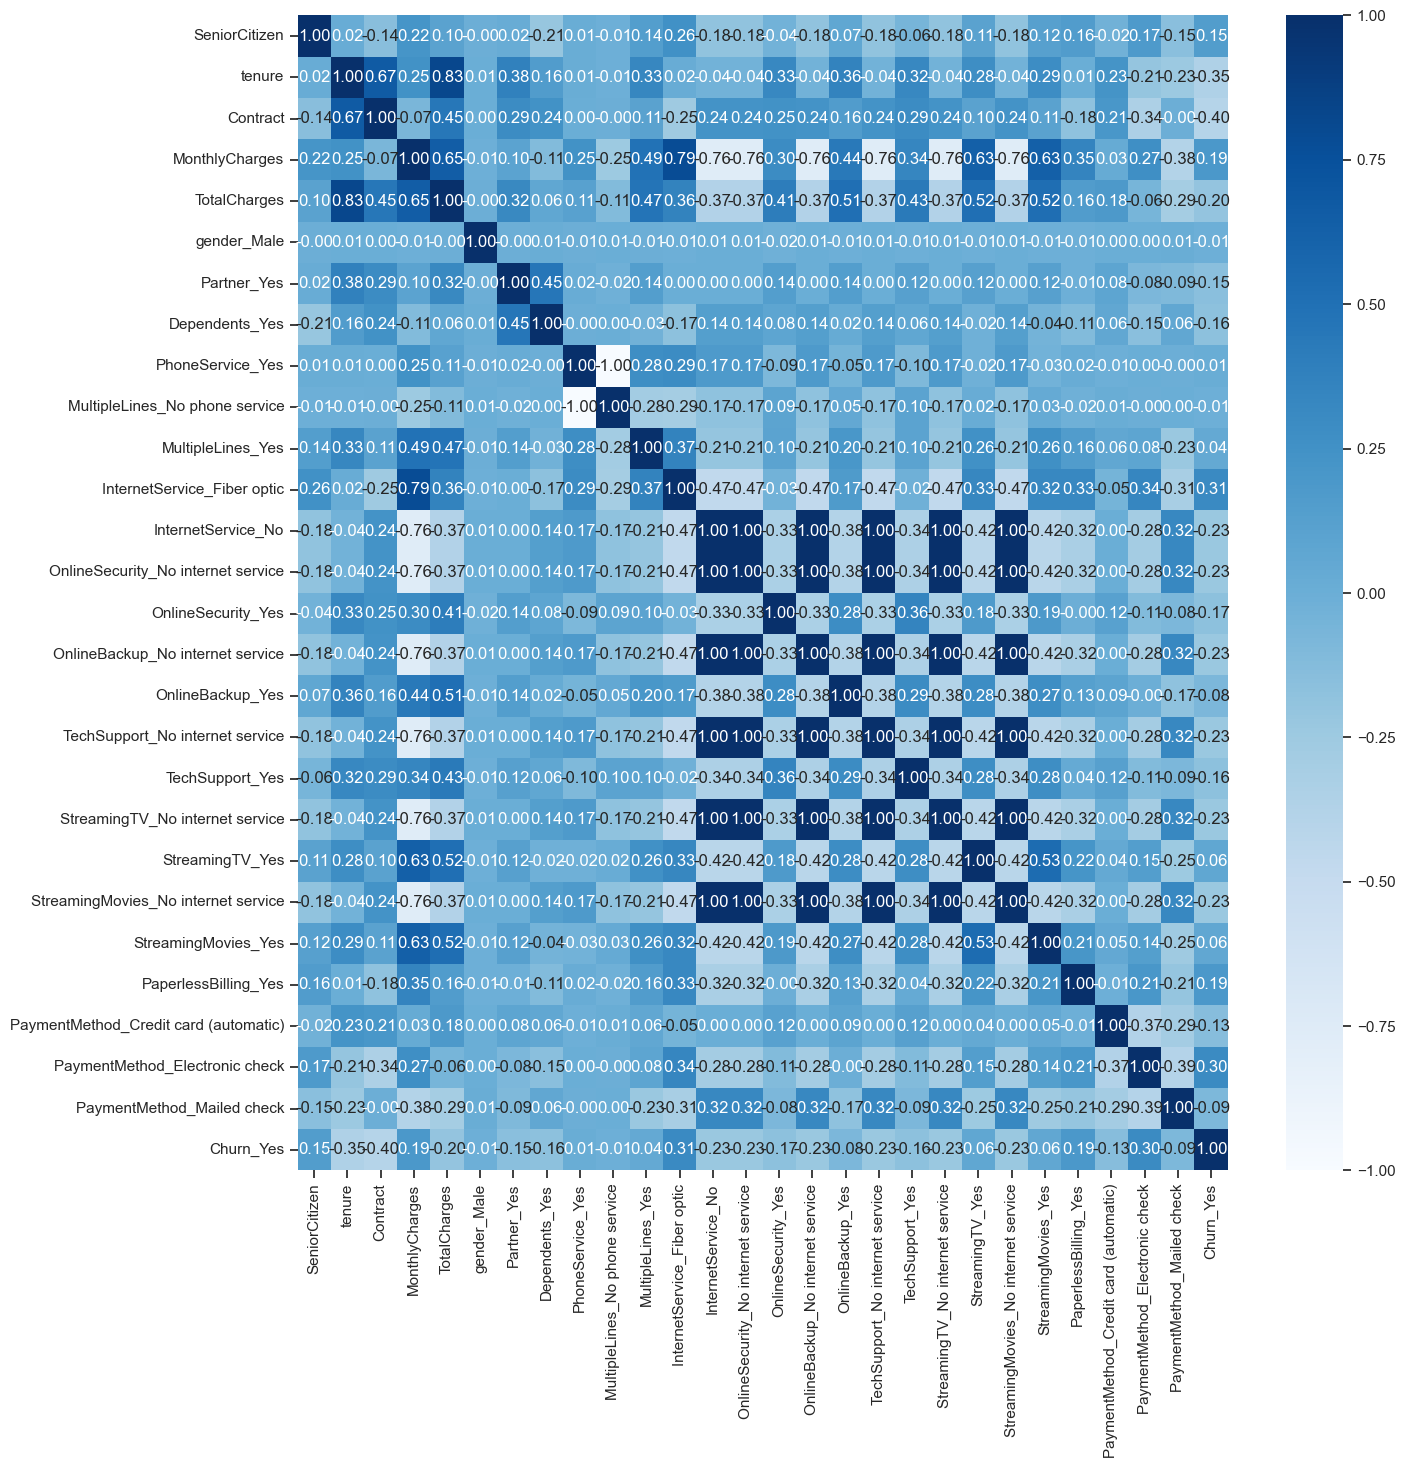

In [90]:
df_corr = df_encoded.corr()

plt.figure(figsize=(15,15))
sns.heatmap(df_corr, annot=True, cmap='Blues',fmt=".2f")
plt.show()

## 변수들이 Churn과 어떤 관련이 있는지 

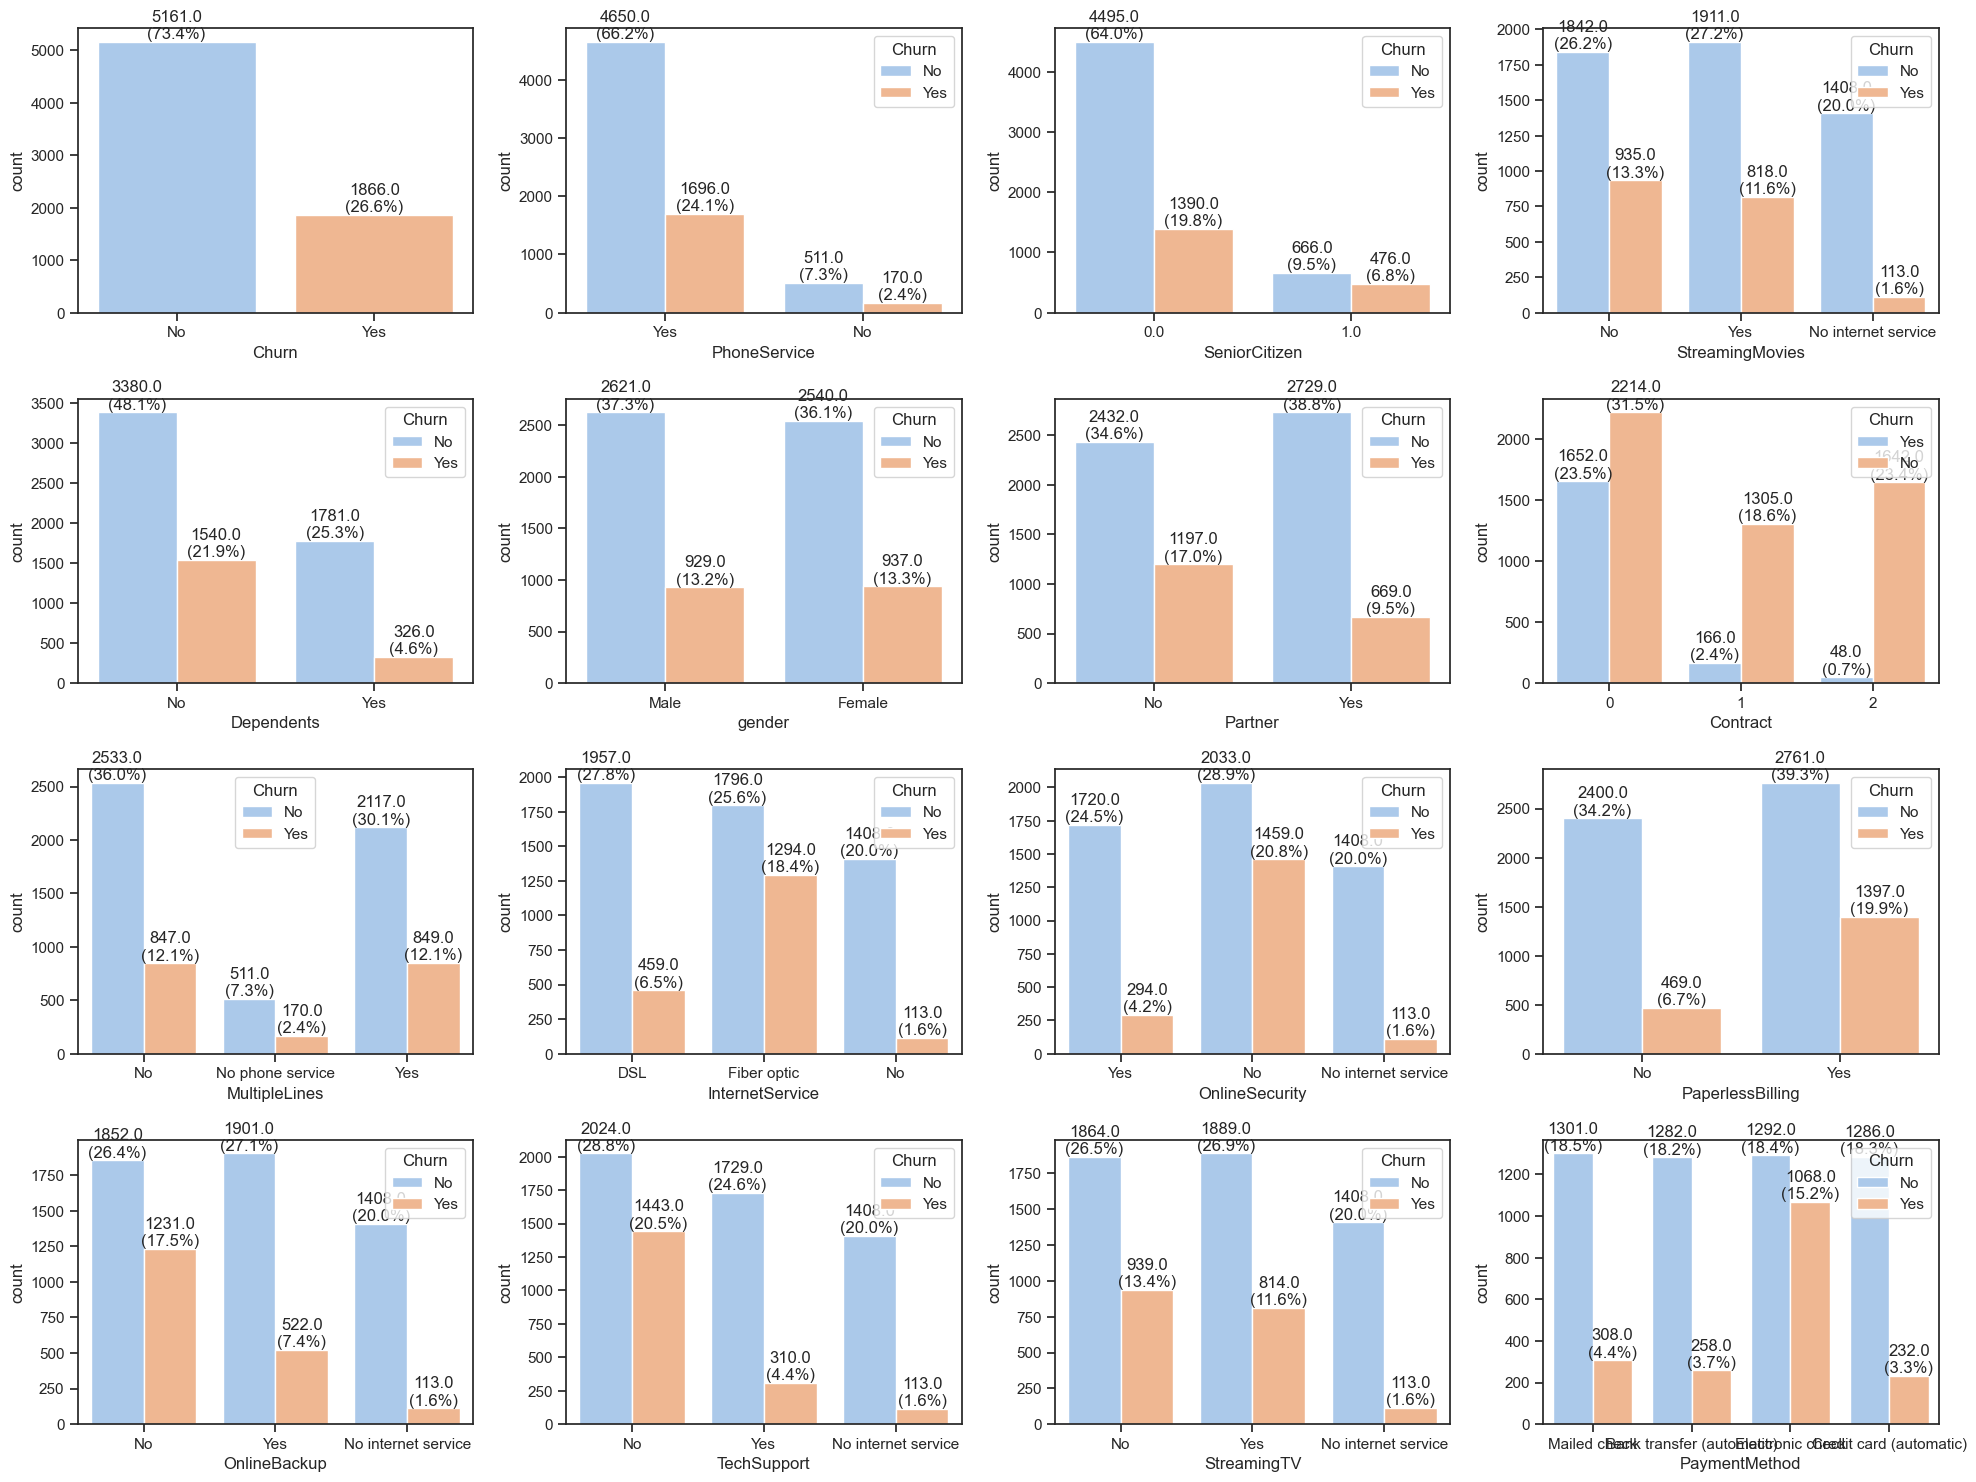

In [141]:
fig, ax = plt.subplots(4, 4, figsize=(20, 15))

sns.countplot(data=df, x='Churn', hue='Churn', ax=ax[0, 0])
sns.countplot(data=df, x='Dependents', hue='Churn', ax=ax[1, 0])
sns.countplot(data=df, x='MultipleLines', hue='Churn', ax=ax[2, 0])
sns.countplot(data=df, x='OnlineBackup', hue='Churn', ax=ax[3, 0])

sns.countplot(data=df, x='PhoneService', hue='Churn', ax=ax[0, 1])
sns.countplot(data=df, x='gender', hue='Churn', ax=ax[1, 1])
sns.countplot(data=df, x='InternetService', hue='Churn', ax=ax[2, 1])
sns.countplot(data=df, x='TechSupport', hue='Churn', ax=ax[3, 1])

sns.countplot(data=df, x='SeniorCitizen', hue='Churn', ax=ax[0, 2])
sns.countplot(data=df, x='Partner', hue='Churn', ax=ax[1, 2])
sns.countplot(data=df, x='OnlineSecurity', hue='Churn', ax=ax[2, 2])
sns.countplot(data=df, x='StreamingTV', hue='Churn', ax=ax[3, 2])

sns.countplot(data=df, x='StreamingMovies', hue='Churn', ax=ax[0, 3])
sns.countplot(data=df, x='Contract', hue='Churn', ax=ax[1, 3])
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', ax=ax[2, 3])
sns.countplot(data=df, x='PaymentMethod', hue='Churn', ax=ax[3, 3])

for i in range(len(ax)):
    for j in range(len(ax[i])):
        for p in ax[i, j].patches:
            height = p.get_height()
            if height > 0:
                ratio = height / len(df) * 100 
                ax[i, j].annotate(f'{height}\n({ratio:.1f}%)', 
                                  (p.get_x() + p.get_width() / 2., height), 
                                  ha='center', va='bottom')

plt.tight_layout()
plt.show()

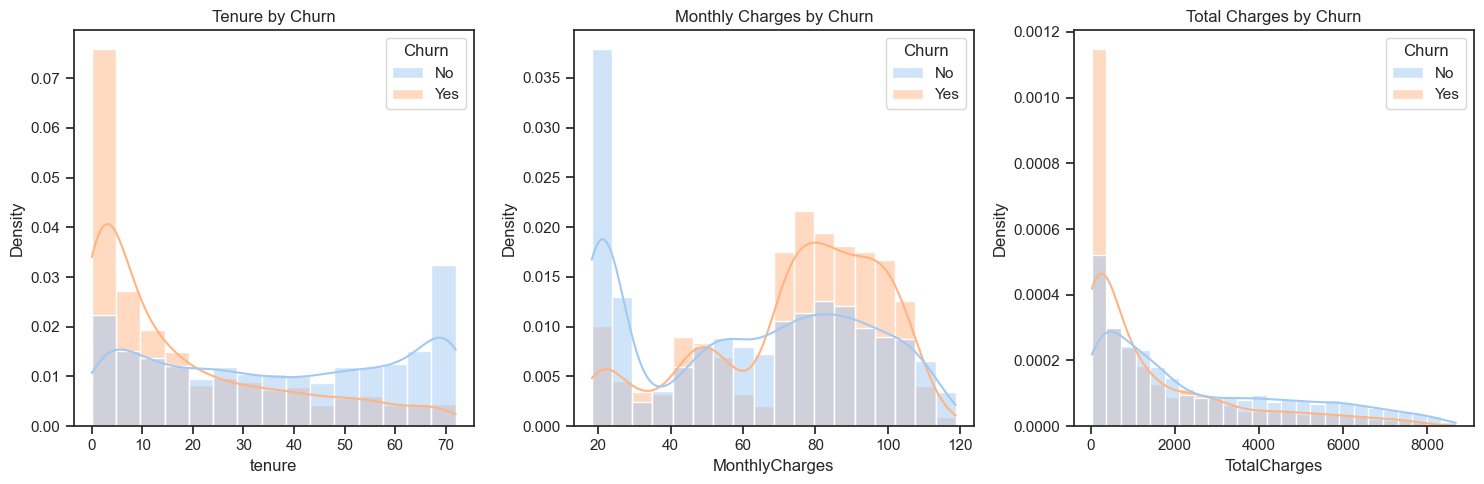

In [135]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=df, x='tenure', hue='Churn', kde=True, ax=ax[0], stat="density", common_norm=False)
ax[0].set_title('Tenure by Churn')

sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, ax=ax[1], stat="density", common_norm=False)
ax[1].set_title('Monthly Charges by Churn')

sns.histplot(data=df, x='TotalCharges', hue='Churn', kde=True, ax=ax[2], stat="density", common_norm=False)
ax[2].set_title('Total Charges by Churn')

plt.tight_layout()
plt.show()

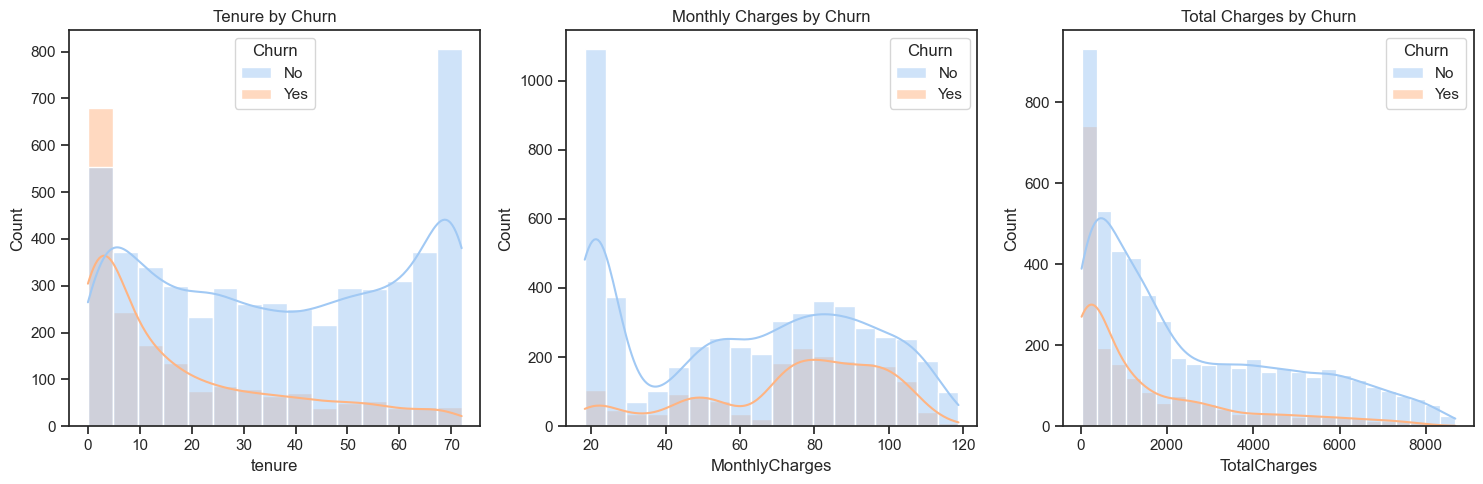

In [133]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=df, x='tenure', hue='Churn', kde=True, ax=ax[0])
ax[0].set_title('Tenure by Churn')

sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, ax=ax[1])
ax[1].set_title('Monthly Charges by Churn')

sns.histplot(data=df, x='TotalCharges', hue='Churn', kde=True, ax=ax[2])
ax[2].set_title('Total Charges by Churn')

plt.tight_layout()
plt.show()

# # 5. 결과 저장하기

## 결과를 csv 파일로 저장하기

# #X. 랩업
1. 필요 라이브러리 임포트 및 파일 읽어오기 : pd.read_csv()
2. EDA (Exploratory Data Analysis) 탐색적 데이터 분석 : df.info(), df.head(), df.tail()
3. 데이터 전처리 수행
 + 불필요 컬럼 삭제 : df.drop()
 + 컬럼 내용 변경하기 : df.replace()
 + Null 처리 : df.replace(), df.fillna()
 + 컬럼 type 변경하기 : df['col'].astype(int)
4. 시각화
 + matplotlib, seaborn
 + bar, scatter, countplot, boxplot
5. 결과 저장하기
 + to_csv()